#Assignment 1: Supervised Learning - Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Load & Understanding Dataset

Data yang digunakan adalah data [House Price](https://https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) yang bersumber dari kaggle.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Analytics Zenius/train.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Data terdiri dari 1460 baris dan 81 kolom, dimana kolom SalePrice merupakan target variabel.

##Data Preprocessing

###Check Null & Missing Value

In [ ]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,PoolQC,1453,99.52
1,MiscFeature,1406,96.30
2,Alley,1369,93.77
3,Fence,1179,80.75
4,FireplaceQu,690,47.26
5,LotFrontage,259,17.74
6,GarageYrBlt,81,5.55
7,GarageCond,81,5.55
8,GarageType,81,5.55
9,GarageFinish,81,5.55


In [ ]:
col_missing_value = data_missing_value['feature'].tolist()
df[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   FireplaceQu   770 non-null    object 
 5   LotFrontage   1201 non-null   float64
 6   GarageYrBlt   1379 non-null   float64
 7   GarageCond    1379 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  BsmtFinType2  1422 non-null   object 
 12  BsmtExposure  1422 non-null   object 
 13  BsmtQual      1423 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  BsmtFinType1  1423 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  MasVnrType    1452 non-null   object 
 18  Electrical    1459 non-null 

Semua feature yang memiliki missing value bertipe object kecuali LotFrontage, MasVnrArea, dan GarageYrBlt adalah feature yang bertipe numeric.
- Missing value >= 80%: PoolQc, MiscFeature, Alley, and Fence have .
- Missing value > 10%: FireplaceQu, LotFrontage has 17.8% missingness.

- Missing value about 5%: GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond

- Missing value < 3%: MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical



###Data Cleaning

In [ ]:
#Drop Id
df = df.drop('Id', axis=1)

Dropping Id dilakukan karena feature ini tidak digunakan dalam modeling

In [ ]:
#Handling Missing Value for Categoric Features with missingness >80%
dropped_columns = ["MiscFeature", "Alley", "Fence", "PoolQC"]
df = df.drop(dropped_columns, axis=1)

In [ ]:
#Handling Missing Value for FireplaceQu
df['FireplaceQu'] = np.where(df['FireplaceQu'].isnull(),"Unk",df['FireplaceQu'])

In [ ]:
#Handling Missing Value for Categoric Features with missingness <10%
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [ ]:
#Handling Missing Value for Numeric Features
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

###Categorical Encoding

In [ ]:
cats=[i for i in df.columns if df[i].dtypes == 'object']
nums=[i for i in df.columns if df[i].dtypes != 'object']

In [ ]:
new_df =  pd.get_dummies(df, columns=cats, drop_first=True)
new_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


##Exploratory Data Analysis

###EDA for numeric features

In [ ]:
#Show statistical summary
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


Berdasarkan nilai Q3 (75%) dan nilai max, terdapat beberapa feature yang terdeteksi adanya outlier (contohnya: LotArea; MasVnrArea; MiscVal; dan target variable, SalePrice).

Kemudian ada beberapa feature yang tidak wajar karena memiliki nilai 0 pada min, 25%, 50%, dan 75%, yaitu:

- BsmtFinSF2
- LowQualFinSF
- BsmtHalfBath
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal

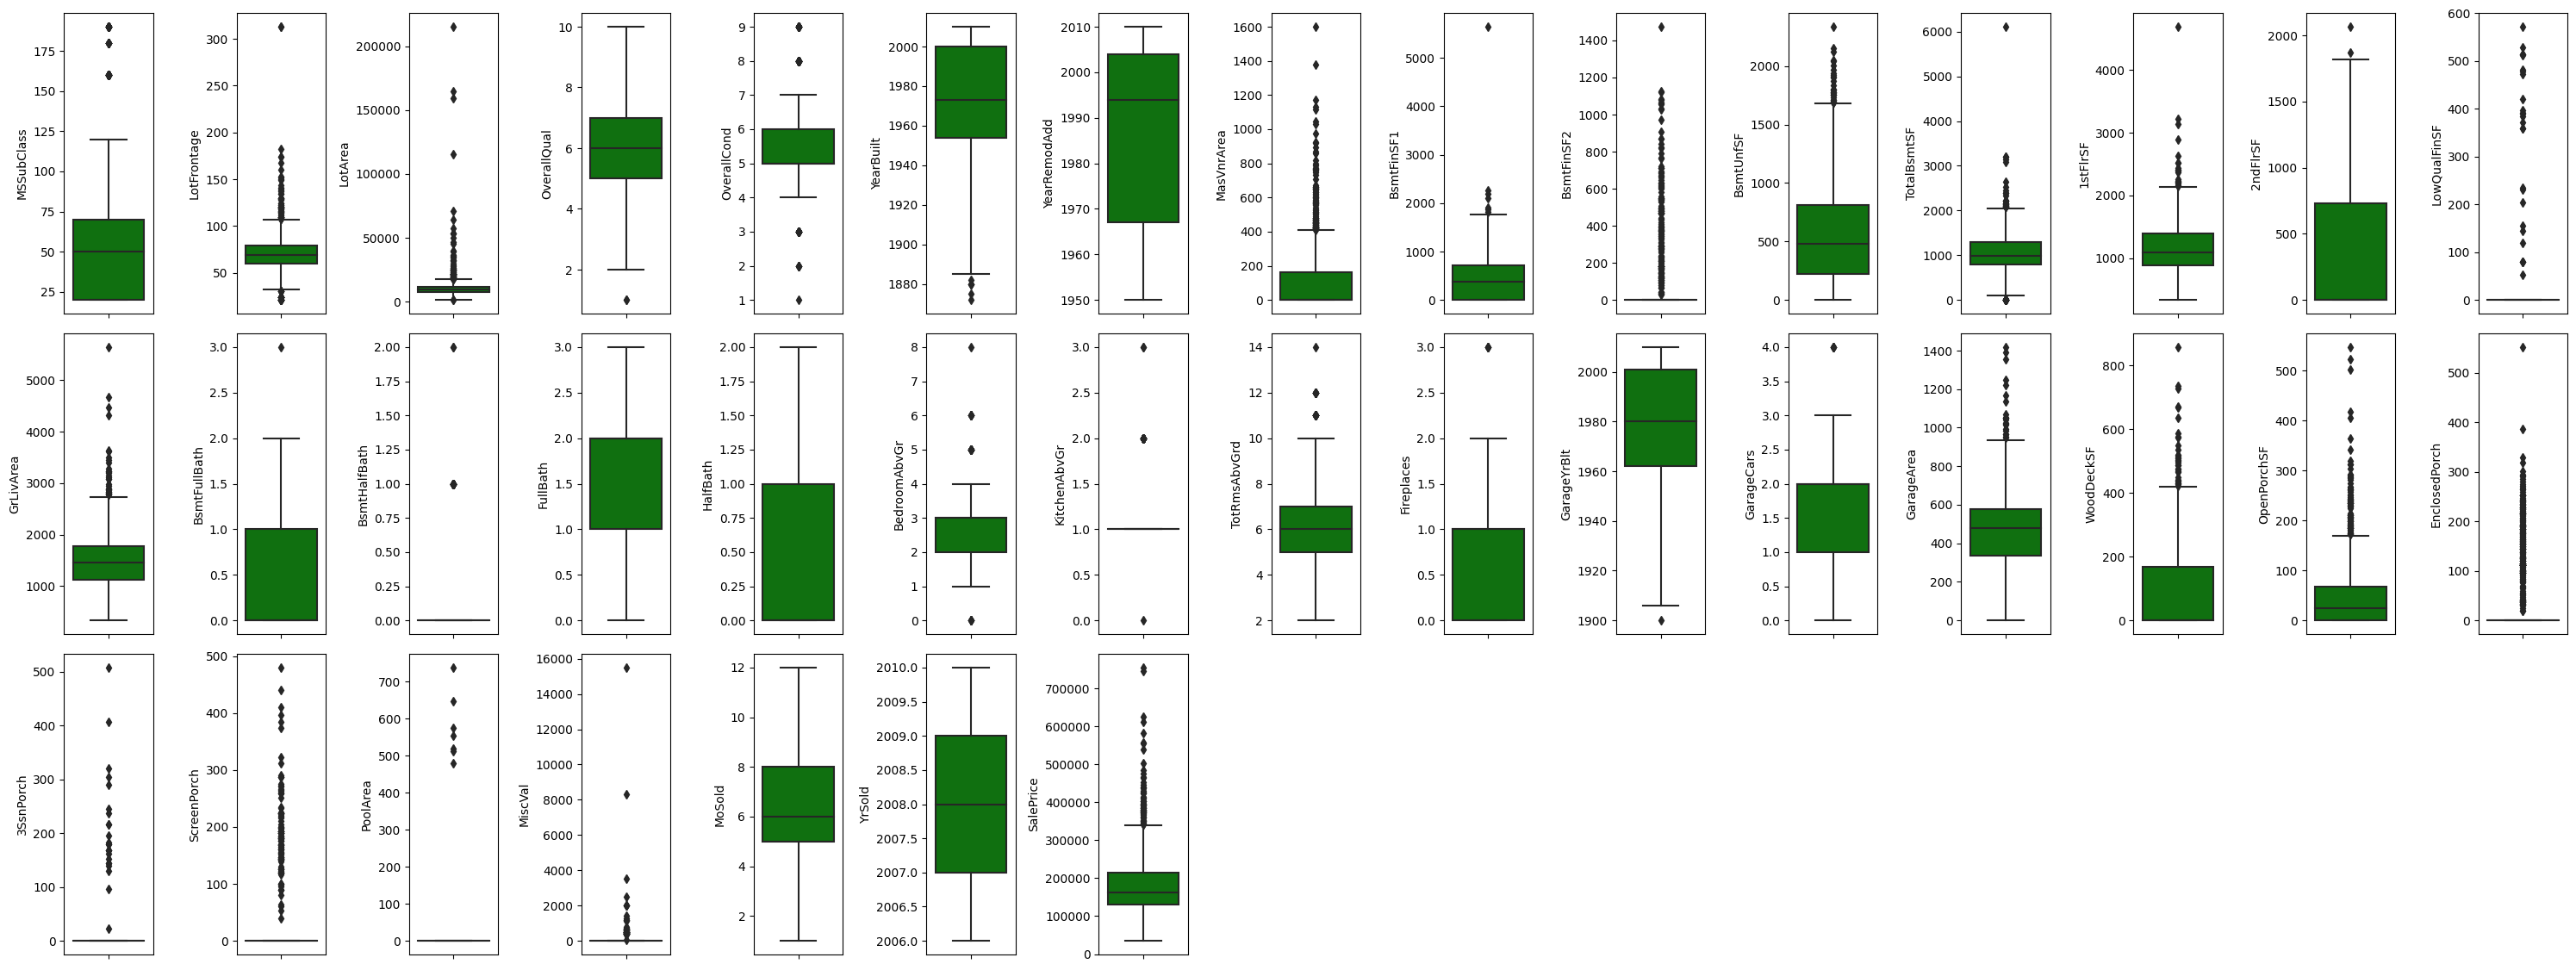

In [ ]:
#Boxplot
plt.figure(figsize=(30,15))
for i in range(0, len(nums)):
    plt.subplot(4, 15, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Berdasarkan hasil boxplot, hampir semua feature terdeteksi memiliki outlier. Namun ada beberapa feature yang hanya memiliki sedikit (<=5)outlier, yaitu:
- MSSubClass
- OverallQual
- OverallCond
- 2ndFlrSF
- BsmtFullBath
- BedroomAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars

Sementara feature yang tidak terdeteksi memiliki outlier adalah YearRemodAdd, FullBath, HalfBath, MoSold, dan YrSold.

<Axes: xlabel='SalePrice', ylabel='Count'>

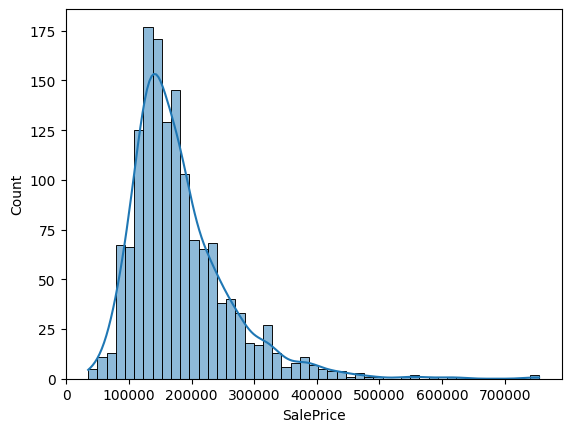

In [ ]:
sns.histplot(df['SalePrice'], kde=True)

Target variable (SalePrice) tidak berdistribusi normal karena data cenderung miring ke kanan atau memiliki positive skewed.

###EDA for categoric features

In [ ]:
#Show statictial summary
df[cats].describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


Ada beberapa feature yang memiliki banyak sekali kategori, seperti Neighborhood, Exterior1st, dan Exterior2nd.

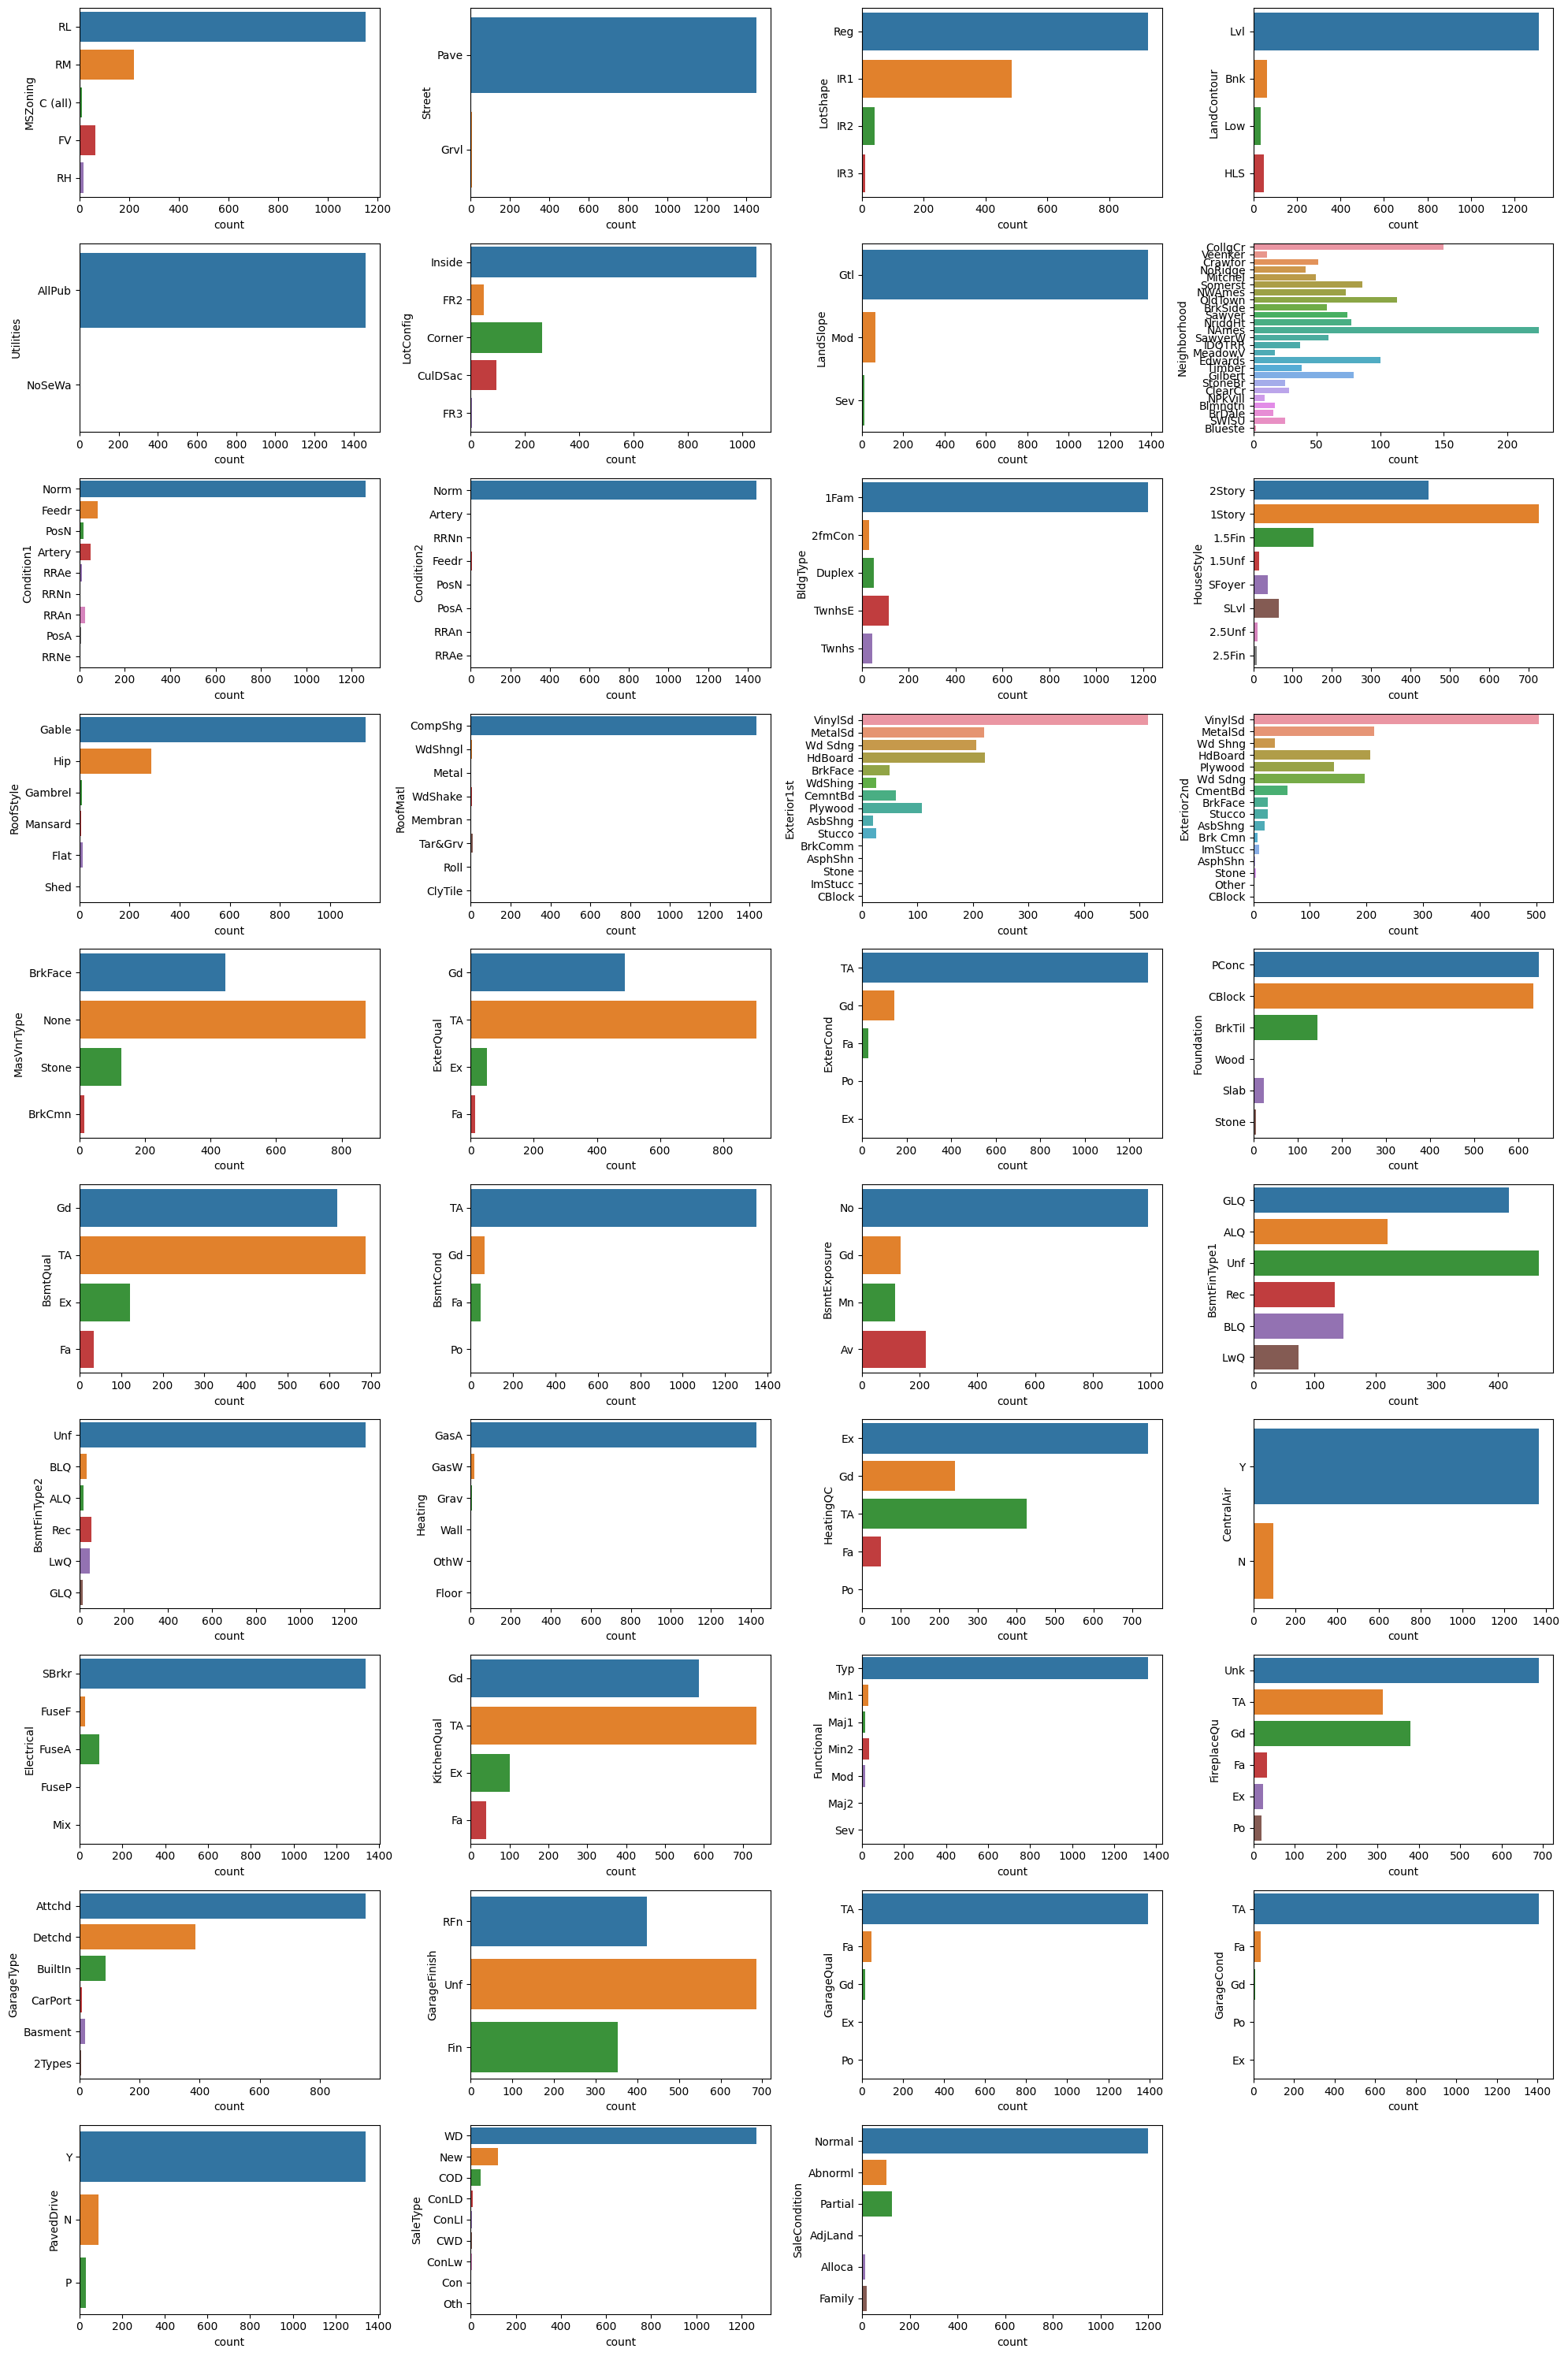

In [ ]:
#countplot
plt.figure(figsize=(20,30))
for i in range(0, len(cats)):
    plt.subplot(10, 4, i+1)
    sns.countplot(y = df[cats[i]], orient='v')
    plt.tight_layout()

###Correlation heatmap

<Axes: >

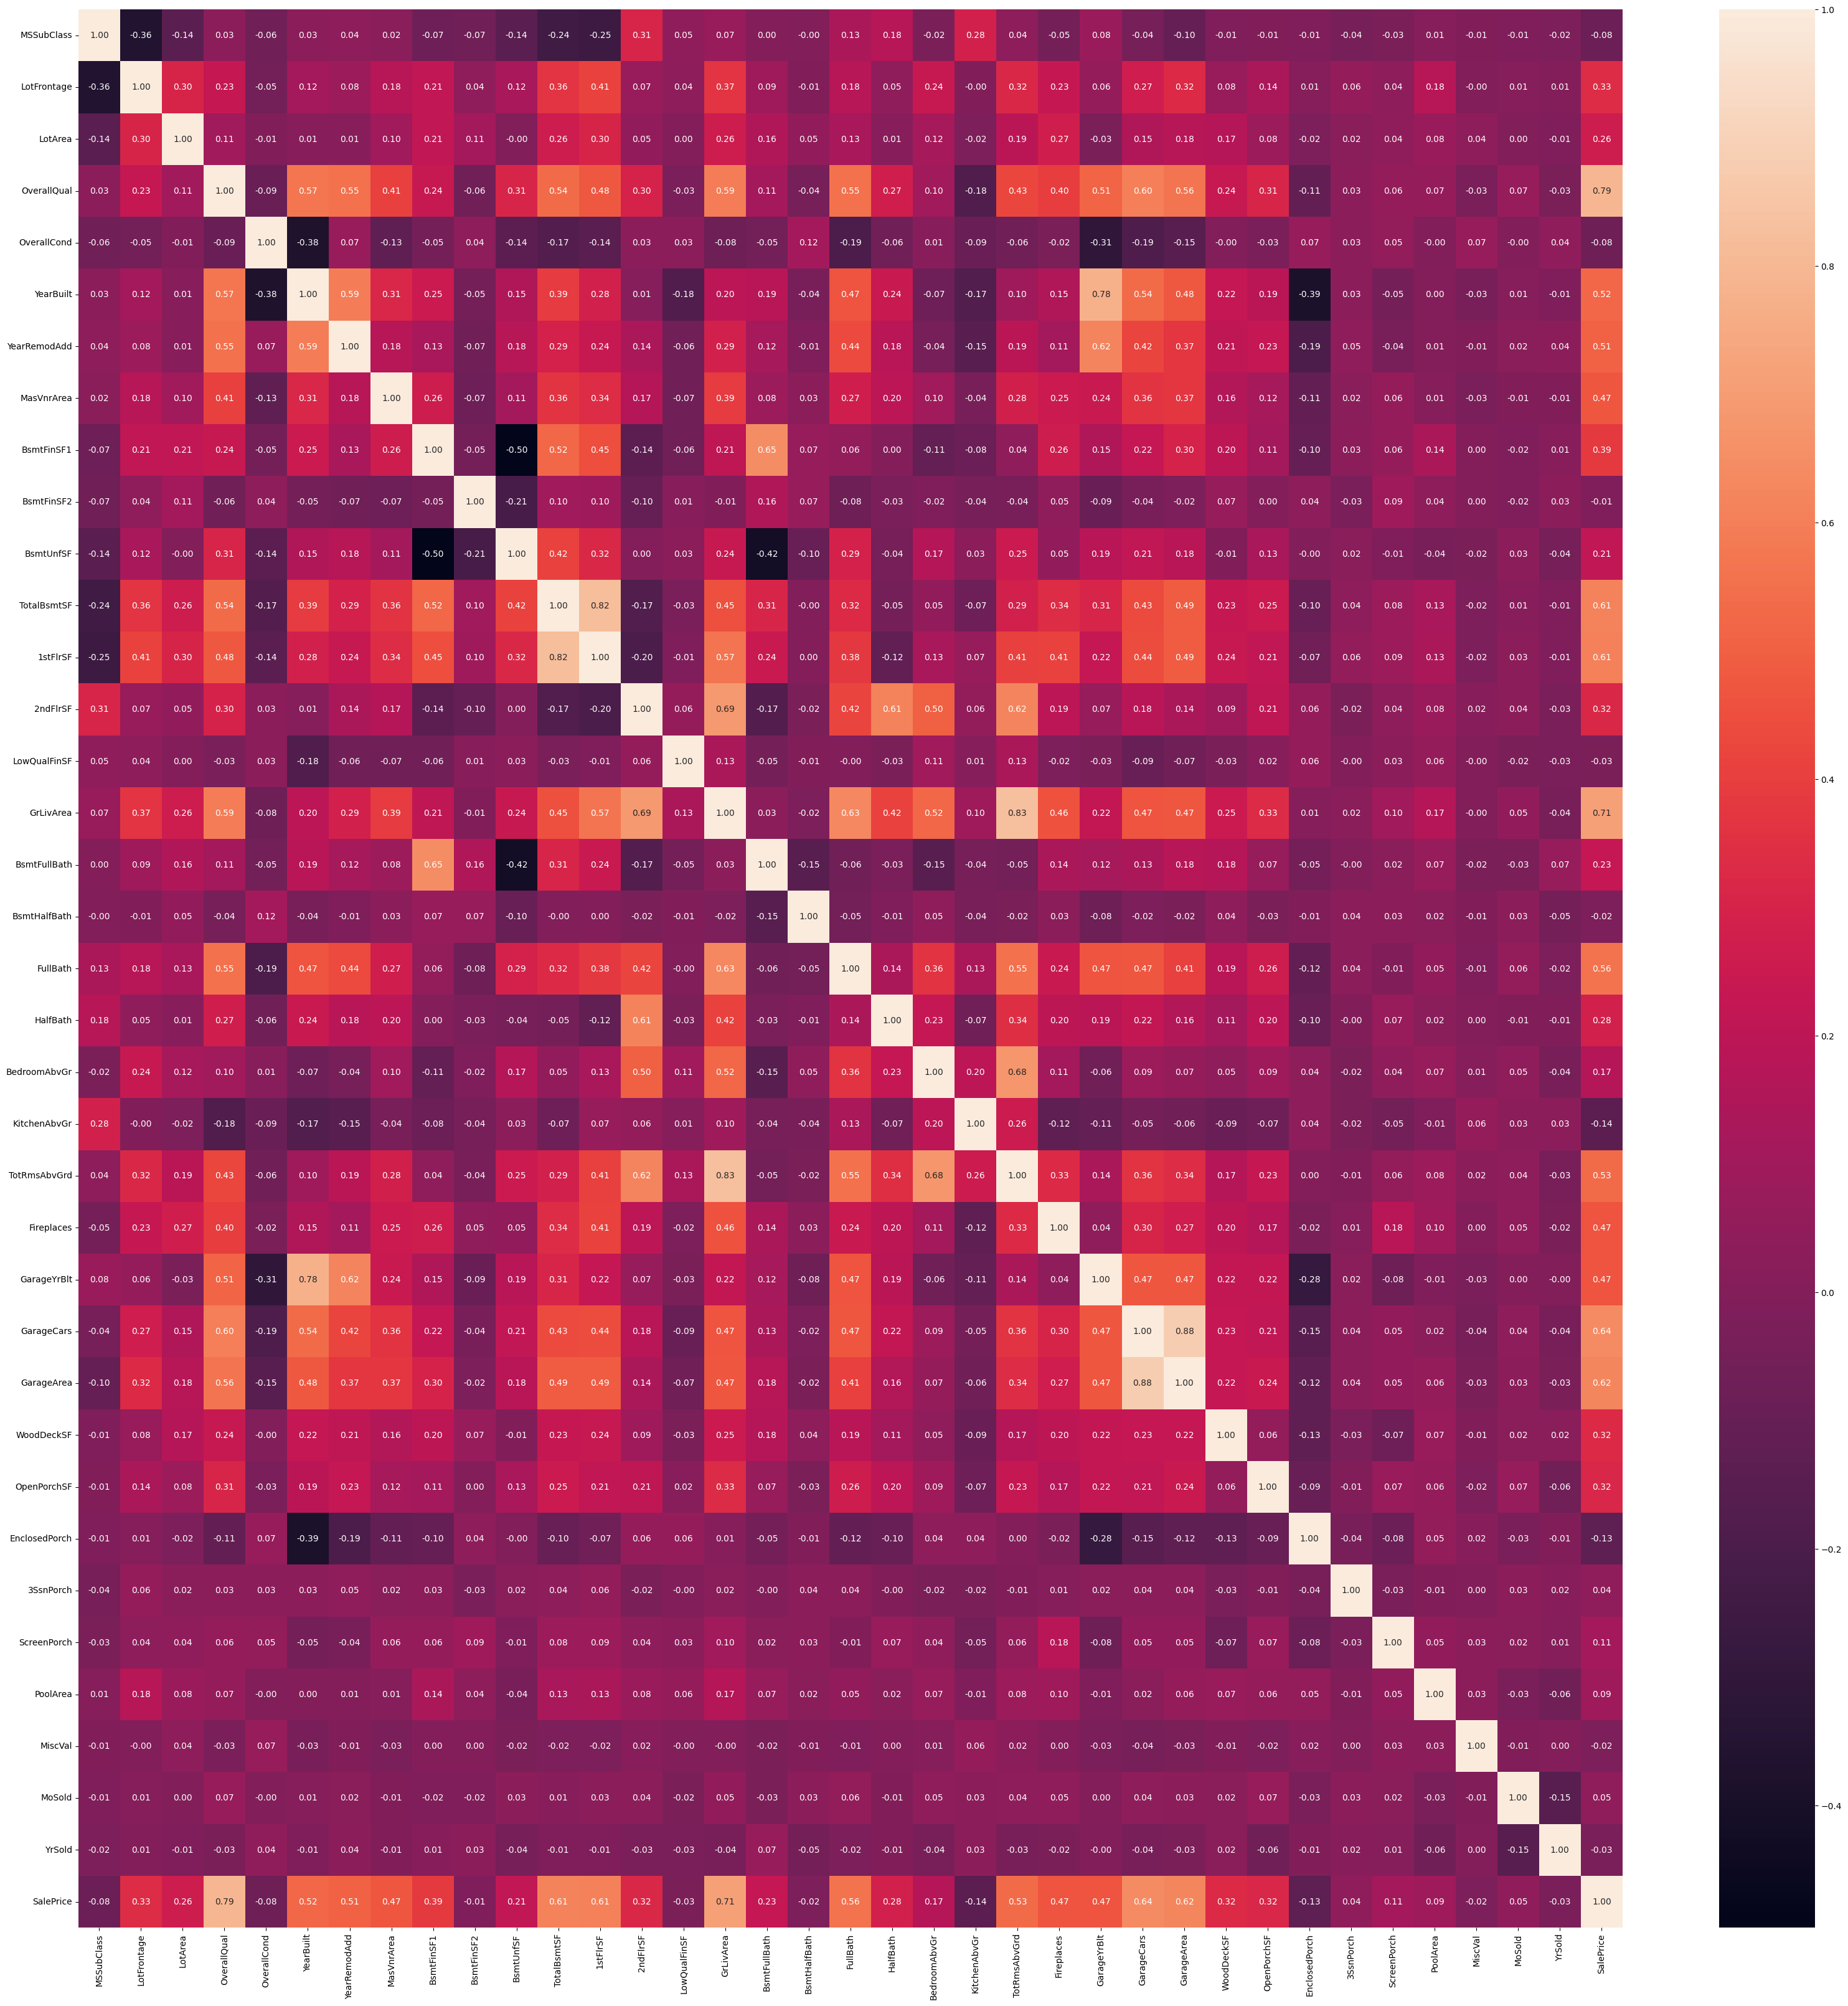

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Feature yang berkorelasi kuat (>0.6) dengan target (SalePrice) adalah:
- OverallQual
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- GarageCars
- GarageArea

Adapun korelasi yang dimiliki oleh feature di atas merupakan korelasi positif, artinya semakin tinggi nilai-nilai feature tersebut maka akan semakin tinggi pula nilai SalePrice.

Feature yang berkorelasi kuat ini kemudian menjadi feature-feature yang akan dimodelkan dalam model regresi.

<Axes: >

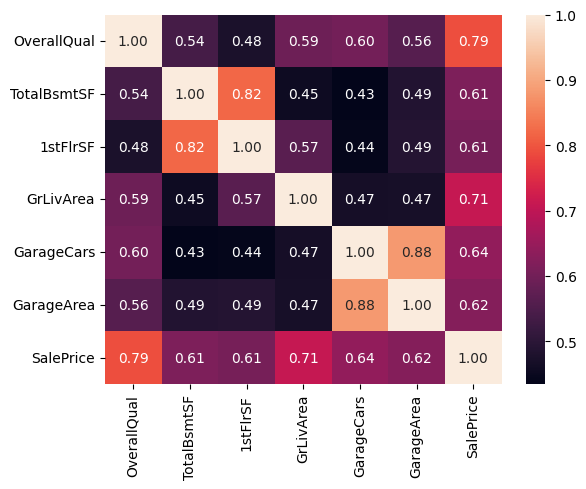

In [ ]:
corr = df.corr()
high_corr_features = corr.index[abs(corr['SalePrice'])>0.60]
sns.heatmap(df[high_corr_features].corr(), annot=True, fmt='.2f')

**Check Multicolinearity**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# compute the correlation matrix
corr = df.corr()

# compute the VIF values
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df[high_corr_features].values, i) for i in range(df[high_corr_features].shape[1])]
vif['Feature'] = df[high_corr_features].columns

# print the VIF values and visualize the correlation matrix
print("VIF values:\n", vif)

VIF values:
    VIF Factor      Feature
0   26.033047  OverallQual
1   23.730221  TotalBsmtSF
2   33.237779     1stFlrSF
3   20.584457    GrLivArea
4   32.941039   GarageCars
5   28.638340   GarageArea
6   19.975871    SalePrice


Nilai VIF pada masing-masing feature lebih besar dari 10, artinya terdapat multikolinieritas / adanya korelasi yang kuat antar feature. Adanya multikolinieritas ini melanggar asumsi yang harus dipernuhi dalam regresi linier dan untuk mengatasinya maka dilakukan pemodelan menggunakan regresi ridge.

##Sampling Dataset

Dataset dipisah menjadi data training dan data testing dengan kofigurasi 70:30.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[high_corr_features].drop('SalePrice', axis=1).values
Y = df[high_corr_features]['SalePrice'].values

X_train, X_test,Y_train,Y_test = train_test_split(X,Y,
                                                test_size = 0.3,
                                                random_state = 42)

print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)

Shape of training set  (1022, 6)
Shape of test set  (438, 6)


##Finding Best Model I: Linear Regression vs Ridge Regression vs Lasso Regression

Regresi ridge adalah regresi yang mampu mengatasi masalah multikolinieritas dalam regresi linier. Sementara regresi Lasso mirip dengan regresi ridge, namun pada regresi lasso, yang digunakan adalah nilai absolut, bukan kuadrat seperti ridge. Dengan begitu, nilai yang menyebabkan estimasi parameter bisa benar-benar nol. Kedua metode ini, mampu mengurangi variabilitas dan meningkatkan akurasi model regresi linier.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
regressors = [LinearRegression(),
              Lasso(),
              Ridge()]
reg = pd.DataFrame(columns = ['Method', 'MAE', 'RMSE', 'R2 Score'])

In [ ]:
for regressor in regressors:
    regressor.fit(X_train, Y_train)
    y_pred = regressor.predict(X_test)

    method = str(type(regressor)).split('.')[-1][:-2]

    # MAE score
    mae = mean_absolute_error(Y_test, y_pred)

    #RMSE Score
    rmse_value = mean_squared_error(Y_test, y_pred, squared=False)

    #MAPE Score
    mape_value = mean_absolute_percentage_error(Y_test, y_pred)

    #R2 Score
    r2 = r2_score(Y_test, y_pred)

    reg = reg.append({'Method': method,
                    'MAE': mae,
                    'RMSE': rmse_value,
                    'MAPE': mape_value,
                    'R2 Score': r2},
                     ignore_index=True)
print(reg)

             Method           MAE          RMSE  R2 Score      MAPE
0  LinearRegression  25029.233108  37888.983915  0.794274  0.152863
1             Lasso  25028.576714  37888.600140  0.794278  0.152858
2             Ridge  25016.694901  37881.911416  0.794351  0.152765


Untuk menemukan model terbaik, kita dapat menggunakan performa dari evaluasi model, seperti R-square, MAE, RMSE, dan MAPE. Semakin tinggi nilai R-square maka model semakin baik. Sebaliknya, semakin rendah nilai MAE, RMSE, dan MAPE maka model akan semakin baik. Sehingga dapat disimpulkan bahwa model terbaik di antara metode regresi di atas adalah regresi ridge karena memiliki nilai R-square terbesar dan memiliki nilai MAE, RMSE, dan MAPE terendah. Hal ini sejalan dengan teori bahwa regresi ridge mampu mengatasi adanya multikolinieritas dalam data ini.

###Modeling with Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rr = Ridge()
rr.fit(X_train,Y_train)
rr.coef_

array([2.43996578e+04, 1.77869953e+01, 1.15753036e+01, 3.89637029e+01,
       1.83779691e+04, 8.66862576e+00])

In [ ]:
rr.intercept_

-97105.73508893736

### Prediction

In [ ]:
Y_pred = rr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

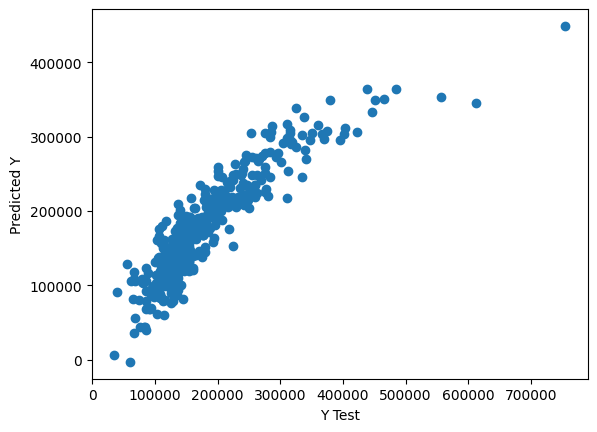

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

###Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
R2 = rr.score(X_train, Y_train, sample_weight=None)
MAE = mean_absolute_error(Y_test, Y_pred)
RMSE = mean_squared_error(Y_test, Y_pred, squared=False)
MAPE = mean_absolute_percentage_error(Y_test, Y_pred)

print('R-Square: ', R2)
print('MAE: ', MAE)
print('RMSE: ', RMSE)
print('MAPE: ', MAPE)

R-Square:  0.7422161980908917
MAE:  25016.694900739996
RMSE:  37881.911415606155
MAPE:  0.1527649523715282


###Summary
1. Model regresi ridge yang terbentuk:

  Y_pred = -97105.74 + 24399,6578 * OverallQual + 17,7869953 * TotalBsmtSF + 11,5753036 * 1stFlrSF + 38,9637029 * GrLivArea + 18377,9691 * GarageCars + 8.66862576 * GarageArea
2. Performasi pemodelan feature terhadap target dalam model regresi ridge yang terbentuk adalah sebesar 74,2%.
3. Terdapat beberapa metode untuk mengevaluasi model, seperti MAE, RMSE, dan MAPE. Masing-masing metode tersebut memiliki makna dan kelebihan serta kekurangan masing-masing, yaitu:
  - **Nilai MAE** atau rata-rata kesalahan absolut dalam model prediksi  adalah 25016.69.

    Kelebihan dari nilai ini adalah mudah dipahami dan menghasilkan nilai absolut sehingga tidak bergantung pada prediksi yang rendah atau tinggi. Namun, MAE tidak memperhitungkan bobot pada kesalahan prediksi yang besar dan kecil, sehingga prediksi yang jauh dari nilai sebenarnya dan prediksi yang dekat dengan nilai sebenarnya dianggap sama pentingnya.
  - **Nilai RMSE** atau akar kuadrat dari rata-rata selisih kuadrat antara nilai prediksi dan nilai aktual adalah 37881.91.

    Kelebihan dari nilai ini adalah kelebihan nilai ini adalah memberikan bobot yang lebih besar pada prediksi yang jauh dari nilai sebenarnya sehingga lebih sensitif pada kesalahan prediksi yang besar Namun, RMSE lebih sulit dipahami dibandingkan dengan MAE dan memerlukan penghitungan tambahan karena melibatkan akar kuadrat.
  - **Nilai MAPE** atau rata-rata kesalahan dalam prediksi sebagai persentase dari nilai aktual adalah 15,3%.

    Kelebihan dari nilai ini adalah kelebihan nilai ini adalah adalah memberikan nilai yang relatif sehingga berguna dalam situasi di mana prediksi bergantung pada persentase kesalahan.Namun, MAPE tidak dapat digunakan untuk data yang memiliki nilai nol atau data yang memiliki variasi nilai yang besar.


##Finding Best Model II: Random Forest vs Decision Tree Regressor

Salah satu keuntungan dari model random forest dan decision tree adalah mampu memodelkan feature numerik dan kategorik tanpa reduksi feature. Random forest pada dasarnya merupakan kumpulan dari beberapa decision trees. “Pohon-pohon” tersebut saling berhubungan hingga akhirnya dapat menghasilkan prediksi yang lebih akurat dan stabil. Makin banyak decision tree yang digunakan, maka makin tinggi tingkat akurasinya. Kelebihan dalam random forest adalah lebih kuat terhadap data outlier dan cukup efisien pada kumpulan data yang besar sehingga akan cocok untuk memprediksi SalePrice pada data ini.

Perbedaan random forest dan decision tree bisa dilihat dari kedalamannya. Sebuah decision tree yang terlalu dalam akan mudah mengalami overfitting. Padahal, overfitting bisa mengurangi akurasi hasil. Pada random forest, hal tersebut tidak dicegah dengan membuat subset fitur secara acak. Subset tersebut kemudian digunakan untuk membuat “pohon” yang lebih kecil dan kemudian digabungkan kembali.

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_new = new_df.drop('SalePrice', axis=1).values
Y_new = new_df['SalePrice'].values

X_train_new, X_test_new,Y_train_new,Y_test_new = train_test_split(X_new,Y_new,
                                                test_size = 0.3,
                                                random_state = 42)

print('Shape of training set ', X_train_new.shape)
print('Shape of test set ', X_test_new.shape)

Shape of training set  (1022, 237)
Shape of test set  (438, 237)


In [ ]:
regressors_1 = [RandomForestRegressor(random_state=1),
              DecisionTreeRegressor()]

reg_1 = pd.DataFrame(columns = ['Method', 'MAE', 'RMSE', 'R2 Score'])

In [ ]:
for regressor in regressors_1:
    regressor.fit(X_train_new, Y_train_new)
    y_pred = regressor.predict(X_test_new)

    method = str(type(regressor)).split('.')[-1][:-2]

    # MAE score
    mae = mean_absolute_error(Y_test_new, y_pred)

    #RMSE Score
    rmse_value = mean_squared_error(Y_test_new, y_pred, squared=False)

    #MAPE Score
    mape_value = mean_absolute_percentage_error(Y_test_new, y_pred)

    #R2 Score
    r2 = r2_score(Y_test_new, y_pred)

    reg_1 = reg_1.append({'Method': method,
                    'MAE': mae,
                    'RMSE': rmse_value,
                    'MAPE': mape_value,
                    'R2 Score': r2},
                     ignore_index=True)

print(reg_1)

                  Method          MAE          RMSE  R2 Score      MAPE
0  RandomForestRegressor  16792.08911  26754.797268  0.897419  0.098695
1  DecisionTreeRegressor  25788.33790  39777.635830  0.773253  0.147051


Untuk menemukan model terbaik, kita dapat menggunakan performa dari evaluasi model, seperti R-square, MAE, RMSE, dan MAPE. Semakin tinggi nilai R-square maka model semakin baik. Sebaliknya, semakin rendah nilai MAE, RMSE, dan MAPE maka model akan semakin baik. Sehingga dapat disimpulkan bahwa model terbaik untuk menggambarkan dan memodelkan prediksi data SalePrice dengan memasukkan semua variabel sebagai feature adalah regresi random forest karena memiliki nilai R-square terbesar dan memiliki nilai MAE, RMSE, dan MAPE terendah.

###Modeling with Random Forest Regression

In [ ]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train_new,Y_train_new)

RandomForestRegressor(random_state=1)

### Prediction

In [ ]:
Y_pred_rf = rf_model.predict(X_test_new)

Text(0, 0.5, 'Predicted Y')

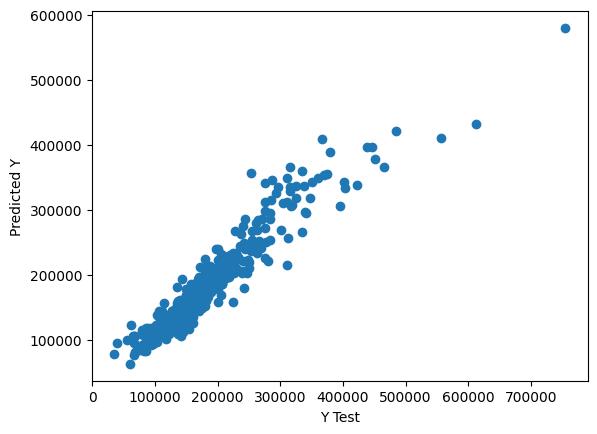

In [ ]:
plt.scatter(Y_test_new, Y_pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

###Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
R2_rf = rf_model.score(X_train_new, Y_train_new, sample_weight=None)
MAE_rf = mean_absolute_error(Y_test_new, Y_pred_rf)
RMSE_rf = mean_squared_error(Y_test_new, Y_pred_rf, squared=False)
MAPE_rf = mean_absolute_percentage_error(Y_test_new, Y_pred_rf)

print('R-Square: ', R2_rf)
print('MAE: ', MAE_rf)
print('RMSE: ', RMSE_rf)
print('MAPE: ', MAPE_rf)

R-Square:  0.9744487920665478
MAE:  16792.089109589044
RMSE:  26754.797267578644
MAPE:  0.09869513132218838


###Feature Importance

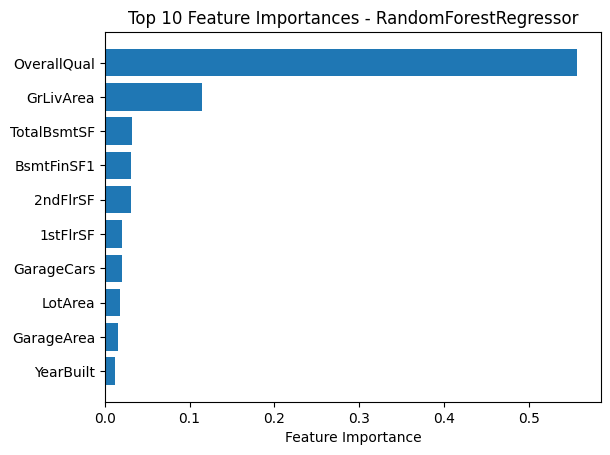

In [ ]:
feature_importances = rf_model.feature_importances_
feature_names = new_df.columns
sorted_indices = np.argsort(feature_importances)[-10:] # Select the top ten features

plt.figure()
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - RandomForestRegressor')
plt.show()

###Summary

1. Performasi pemodelan feature terhadap target dalam model regresi random forest yang terbentuk sangat baik, yaitu sebesar 97,4%.
2. Terdapat beberapa metode lain untuk mengevaluasi model, seperti MAE, RMSE, dan MAPE.
  - **Nilai MAE** atau rata-rata kesalahan absolut dalam model prediksi random forest adalah 16792,09.
  - **Nilai RMSE** atau akar kuadrat dari rata-rata selisih kuadrat antara nilai prediksi dan nilai aktual adalah 26754,8.
  - **Nilai MAPE** atau rata-rata kesalahan dalam prediksi sebagai persentase dari nilai aktual adalah 9,7%.
3. Feature importance tertinggi yang mempengaruhi SalePrice menggunakan model random forest adalah OverallQual, yaitu rating dari keseluruhan material dan finishing rumah.
4. Jika dibandingkan dengan regresi ridge, performa evaluasi model random forest (baik R-quare maupun MAE, RMSE, dan MAPE) lebih unggul. Sehingga dapat dikatakan bahwa model ini adalah model terbaik untuk memprediksi SalePrice berdasarkan hasil akurasi modelnya. Namun, model ini memiliki kekurangan seperti waktu yang diperlukan untuk memodelkan data lebih lama.

#Assignment 2: Unsupervised Learning - Clustering (K-Means)

Metode K-Means clustering merupakan salah satu metode clustering yang populer. Selain simpel, K-Means banyak digunakan untuk clustering dalam banyak aplikasi data science. Metode ini berguna terutama jika perlu mendapatkan insight dengan cepat dari data yang tidak berlabel.

##Load & Understanding Dataset

Data yang digunakan adalah data [Mall Customers](https://drive.google.com/file/d/1or-WR3YU9Pv8S9c07SbXaikENG6nvbji/view?usp=sharing).

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Data Analytics Zenius/Mall_Customers.csv")
df2.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data terdiri dari 200 baris dan 5 kolom. Terdapat 1 data yang bertipe object, yaitu Gender, sedangkan yang lainnya bertipe integer.

##Data Cleaning

In [ ]:
#Drop Id
df2 = df2.drop('CustomerID', axis=1)

In [ ]:
df2.columns = ["Gender",	"Age",	"Annual Income", "Spending Score"]

##Exploratory Data Analysis

###EDA for Numeric Variable

In [ ]:
nums2 = [i for i in df2.columns if df2[i].dtypes != 'object']

In [ ]:
#Show statistical summary
df2[nums2].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


Berdasarkan nilai Q3 (75%) dan nilai max, terdapat feature yang terdeteksi adanya outlier, yaitu Annual Income.

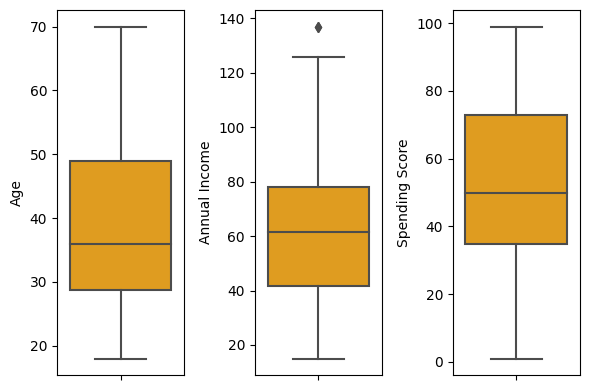

In [ ]:
#Boxplot
plt.figure(figsize=(6,4))
for i in range(0, len(nums2)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df2[nums2[i]], color='orange', orient='v')
    plt.tight_layout()

- Terdapat 1 oulier dalam Annual Income.
- Berdasarkan hasil boxplot, distribusi data variabel Age dan Annual Income adalah positive skewed.
- Berdasarkan hasil boxplot, distribusi data variabel Spending Score adalah normal skewed.

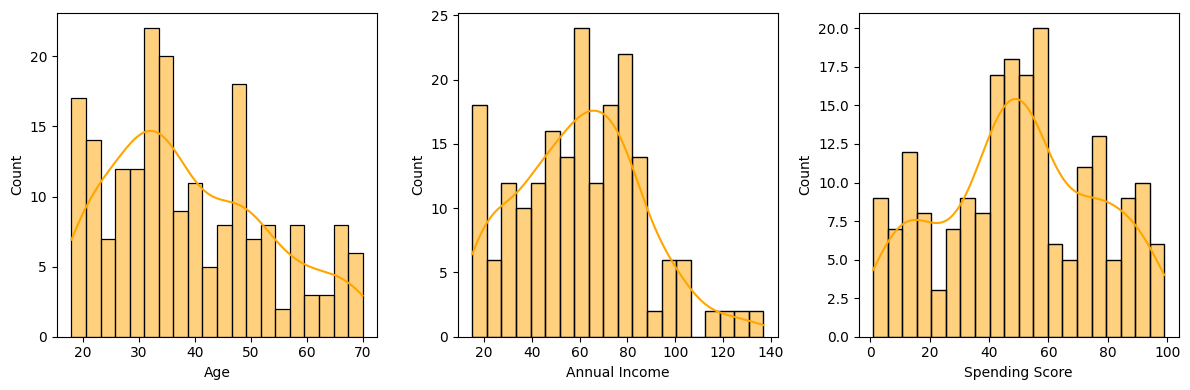

In [ ]:
#Histplot
plt.figure(figsize=(12,4))
for i in range(0, len(nums2)):
    plt.subplot(1, 3, i+1)
    sns.histplot(df2[nums2[i]], color='orange', kde=True, bins=20)
    plt.tight_layout()

- Berdasarkan hasil histplot, distribusi data variabel Age dan Annual Income adalah positive skewed, meskipun pada variabel Age tidak sempurna terbenduk positive skewed karena memiliki beberapa lekukan.
- Berdasarkan hasil histplot, distribusi data variabel Spending Score adalah normal skewed meskipun tidak sempuna membentuk plot distribusi normal karena memiliki beberapa lekukan.

###EDA for Categoric Variable

(-1.0999929225079865,
 1.0999987877686102,
 -1.0999998909991102,
 1.0999999948094814)

<Figure size 300x300 with 0 Axes>

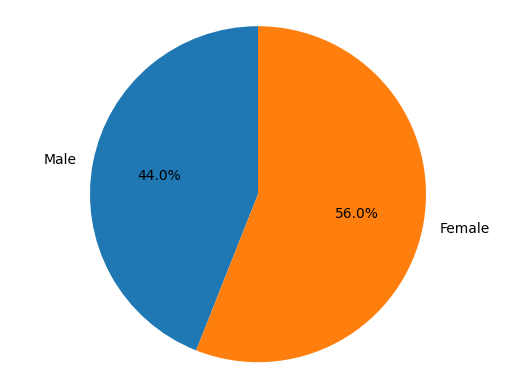

In [ ]:
count_male = len(df2[df2['Gender'] == "Male"])
count_female = len(df2[df2['Gender'] == "Female"])

plt.figure(figsize=(3,3))
labels = ["Male", "Female"]
sizes = [count_male, count_female]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

Persebaran perempuan lebih banyak daripada laki-laki, tetapi masih dapat dikatakan balance.

###Pairplot

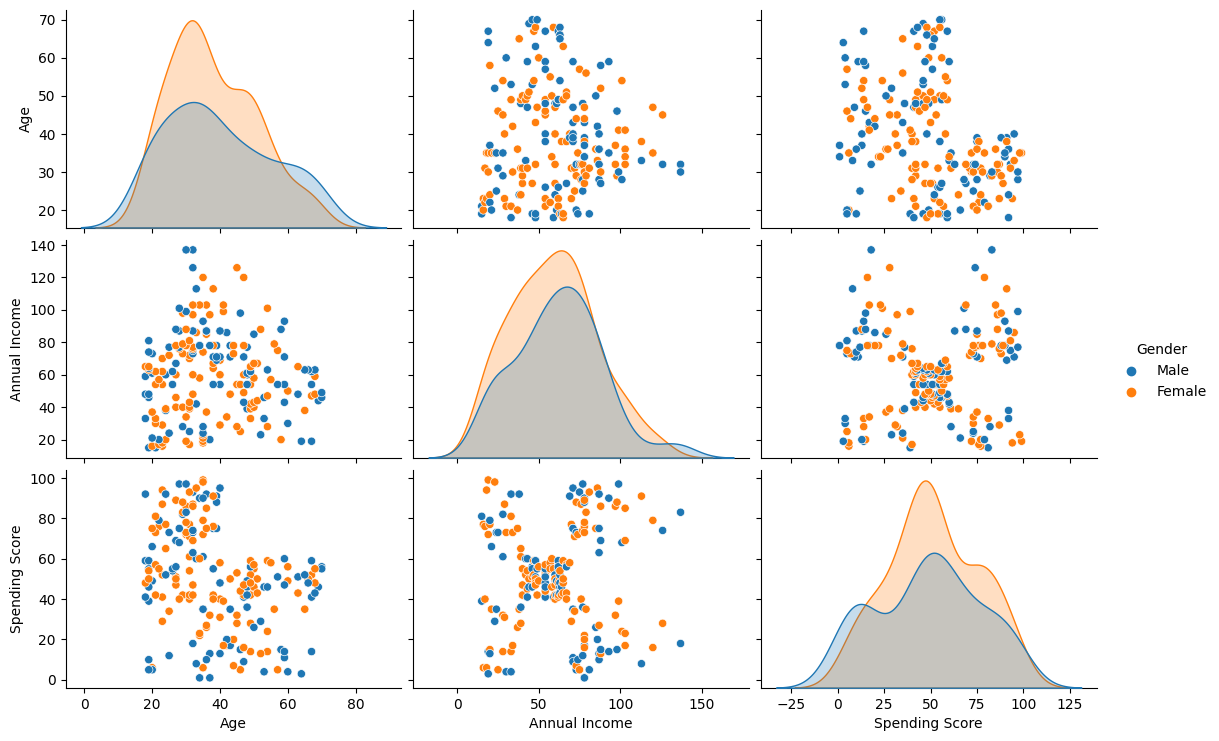

In [ ]:
sns.pairplot(df2, hue='Gender', aspect=1.5)
plt.show()

Berdasarkan pairplot di atas, terlihat bahwa Gender tidak memiliki hubungan langsung terhadap feature-feature yang lain, sehingga untuk mempermudah analisis, kita akan fokus pada feature-feature numerik, yaitu Age, Annual Income, dan Spending Score.

In [ ]:
df2 = df2[nums2].copy()

###Correlation Heatmap

<Axes: >

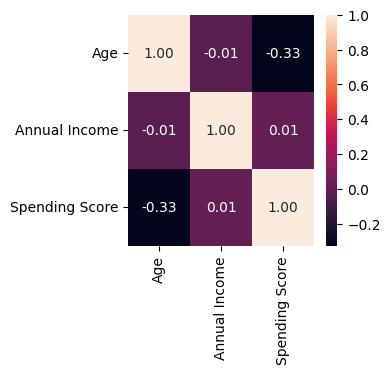

In [ ]:
plt.figure(figsize=(3, 3))
sns.heatmap(df2.corr(), annot=True, fmt='.2f')

Berdasarkan hasil heatmap sebenarnya tidak ada variabel yang berkorelasi kuat karena nilai korelasi nya bahkan kurang dari 0,5. Namun, korelasi paling besar terjadi antara variabel Spending Score dan Age. Kedua variabel ini kemudian menjadi fitur yang akan dimodelkan dalam clustering.

##Modeling & Evaluation

In [ ]:
df2 = df2.drop('Annual Income', axis=1)
df2.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


<Axes: xlabel='Age', ylabel='Spending Score'>

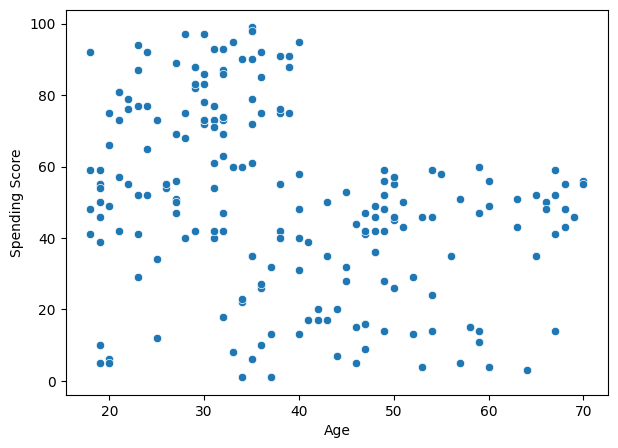

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=df2, x='Age', y='Spending Score')

Berdasarkan hasil scatterplot di atas, dapat terlihat bahwa plot membentuk 4 cluster atau dapat pula terlihat membentuk 5 cluster.

###Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df2)

In [ ]:
feats = list(df2)
dataset = pd.DataFrame(data = X_std, columns = feats)
dataset.head()

,Age,Spending Score
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


###Finding Best K

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
arr_silhouette_score_euclidean = []

for i in range(3, 12):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)
    preds = kmeans.predict(dataset)
    score_euclidean = silhouette_score(dataset, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

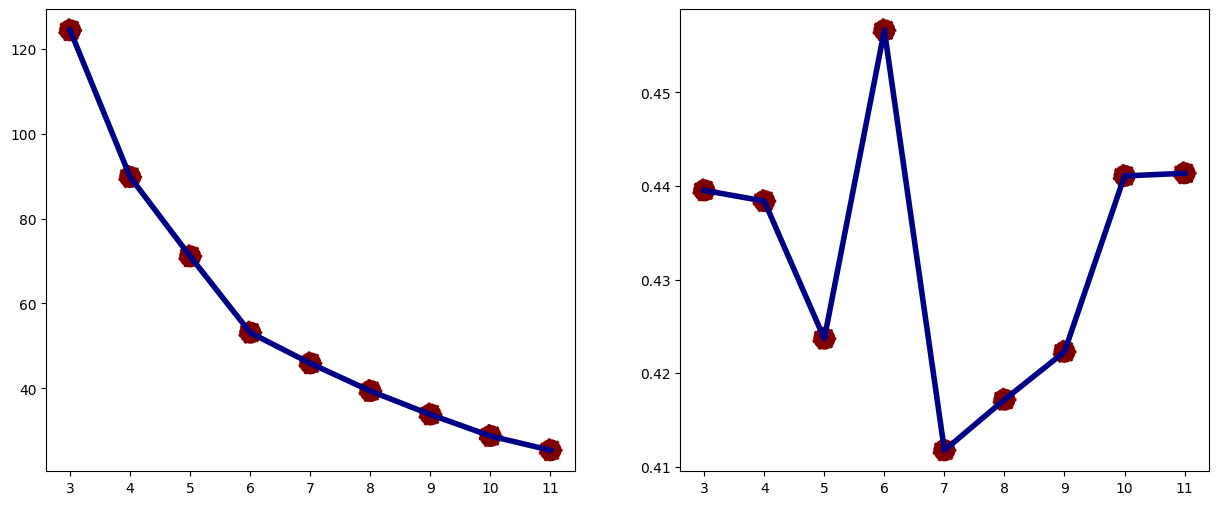

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.lineplot(x=range(3, 12), y=inertia, color='#000087', linewidth = 4, ax=ax[0])
sns.scatterplot(x=range(3, 12), y=inertia, s=300, color='#800000',  linestyle='--',ax=ax[0])

sns.lineplot(x=range(3, 12), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4,ax=ax[1])
sns.scatterplot(x=range(3, 12), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--', ax=ax[1])


- Berdasarkan grafik pertama, terlihat penurunan membentuk elbow atau mementuk siku pada k=4 dan k=6. Sehingga untuk metode elbow diperoleh hasil k optimal 4 dan 6 cluster.
- Pendekatan silhouette menggunakan rata-rata nilai cluster untuk menduga nilai k optimum. Semakin tinggi nilai rata-ratanya maka akan semakin baik clusternya. Berdasarkan grafik kedua, diperoleh banyak cluster optimal sebanyak 6.

Hasil ini kemudian akan dilakukan simulasi model clustering untuk 4 cluster dan 6 cluster.

###Clustering

**4 Cluster**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_std)

KMeans(n_clusters=4, random_state=0)

In [ ]:
df2['cluster_4'] = kmeans.labels_
df2.head()

,Age,Spending Score,cluster_4
0,19,39,2
1,21,81,0
2,20,6,2
3,23,77,0
4,31,40,2


<Axes: xlabel='Age', ylabel='Spending Score'>

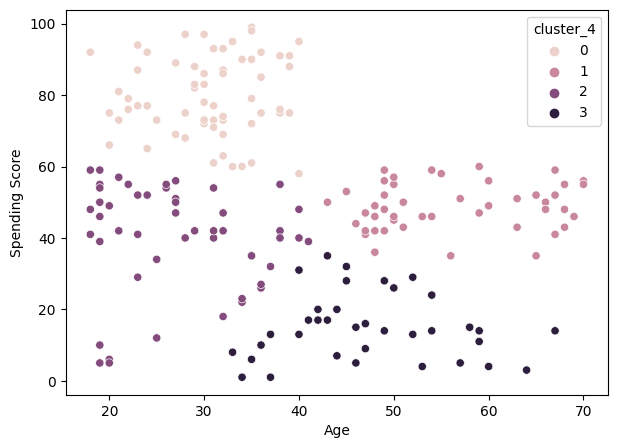

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=df2, x='Age', y='Spending Score', hue='cluster_4')

In [ ]:
display(df2.groupby('cluster_4').agg(['mean', 'count']))

Age       Spending Score      
                mean count           mean count
cluster_4                                      
0          30.292308    65      79.815385    65
1          55.978723    47      48.510638    47
2          27.220000    50      40.040000    50
3          47.605263    38      15.000000    38

Dalam unsupervised learning, kita tidak dapat menentukan mana yang terbaik secara pasti. Berbeda dengan supervised learning yang dapat menentukan model terbaik menggunakan evaluasi seperti MAE, RMSE, ataupun MAPE, pada unsupervised tidak ada metode khusus untuk menentukan performa cluster yang terbaik. Cluster optimal hanya dapat ditentukan melalui elbow method atau silhoutte method. Dari hasil analisa 4 cluster yang terbentuk, kita dapat menemukan insight sebagai berikut.

1. Label 0: young customer dan high spending, ada sebanyak 65 orang
2. Label 1: old customer dan medium spending, ada sebanyak 47 orang
3. Label 2: young customer dan medium spending, ada sebanyak 50 orang
4. Label 3: old customer dan low spending, ada sebanyak 38 orang


**6 Cluster**

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_std)

KMeans(n_clusters=6, random_state=0)

In [ ]:
df2['cluster_6'] = kmeans.labels_
df2.head()

,Age,Spending Score,cluster_4,cluster_6
0,19,39,2,0
1,21,81,0,2
2,20,6,2,4
3,23,77,0,2
4,31,40,2,0


<Axes: xlabel='Age', ylabel='Spending Score'>

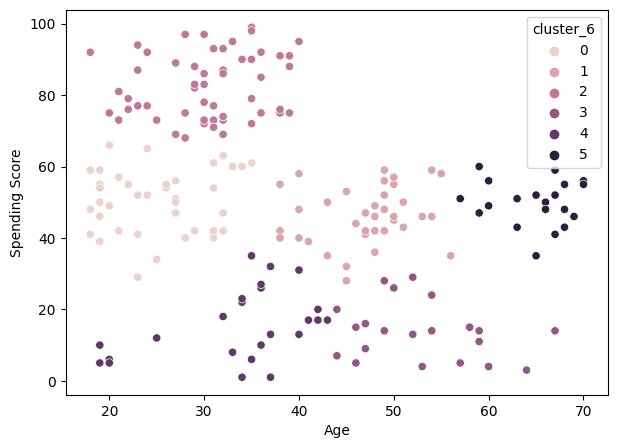

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=df2, x='Age', y='Spending Score', hue='cluster_6')

In [ ]:
display(df2.drop('cluster_4', axis=1).groupby('cluster_6').agg(['mean', 'count']))

Age       Spending Score      
                mean count           mean count
cluster_6                                      
0          25.078947    38      50.473684    38
1          47.081081    37      45.945946    37
2          30.175439    57      82.350877    57
3          52.869565    23      13.956522    23
4          33.680000    25      16.400000    25
5          64.850000    20      49.850000    20

Dari hasil analisa 6 cluster yang terbentuk, kita dapat menemukan insight sebagai berikut.

1. Label 0: young customer dan medium spending
2. Label 1: adult customer dan medium spending
3. Label 2: young customer dan high spending (terbanyak)
4. Label 3: old customer dan low spending
5. Label 4: young customer dan low spending
6. Label 5: old customer dan medium spending (paling sedikit)

##Summary

Jika membandingkan scatterplot antara 4 cluster dan 6 cluster, terlihat bahwa pada 6 cluster terdapat kategori label yang redundant, yaitu label 1. Pada low dan high spending, customer hanya terbangi menjadi 2 kategori yaitu young dan old, tetapi medium spending, katogori customer terbagi menjadi 3 dan hal itu dikelompokan menjadi label 1. Berdasarkan hal ini, dapat disimpulkan bahwa cluster yang lebih baik adalah 4 cluster.